<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Rainfall_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rainfall prediction is a common application of machine learning, and linear regression is a simple and effective technique that can be used for this purpose. In this project the goal is to predict the amount of rainfall based on historical data.

In our rainfall prediction model aim is to design a linear equation where the dependent (target) variable is amount of rainfall and independent variable (feature) are features like temperature,humidity,wind, speed etc.

First step is to collect the data.

second step is to preprocess the data to remove any outliers or missing values

third step is to split the data into training data and testing data.

To perform the linear regression, a hypothesis function is to be established that determines the relationship between input variables and the target variable.

To train the model values of the coefficient(parameters) needs to be minimized using gradient descent or some other optimization algorithm.

Once all this is done the model can be used to predict whether

In [38]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [77]:
dataset = pd.read_csv("/content/drive/MyDrive/DATASET/Rainfall/rainfall.csv")

In [78]:
dataset.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [79]:
#checking if there is a any null data or not
dataset.isnull().sum()

,0
date,0
rainfall,1
temperature,1
humidity,1
wind_speed,1
weather_condition,1


In [80]:
dataset = dataset.dropna()

In [81]:
dataset.isnull().sum()

,0
date,0
rainfall,0
temperature,0
humidity,0
wind_speed,0
weather_condition,0


In [82]:
#dropping the date column as it is not required
dataset = dataset.drop('date',axis=1)

In [35]:
dataset

,rainfall,temperature,humidity,wind_speed,weather_condition
0,12.5,15.2,78.0,8.5,Rainy
1,8.2,17.8,65.0,5.2,Rainy
2,0.0,20.1,52.0,3.1,Sunny
3,3.7,18.6,71.0,6.7,Rainy
4,21.1,14.8,82.0,9.3,Rainy
5,15.3,16.5,75.0,7.8,Rainy
6,6.8,19.2,61.0,4.5,Rainy
7,0.0,21.7,48.0,2.9,Sunny
8,11.2,17.3,73.0,6.1,Rainy
9,18.6,15.8,79.0,8.9,Rainy


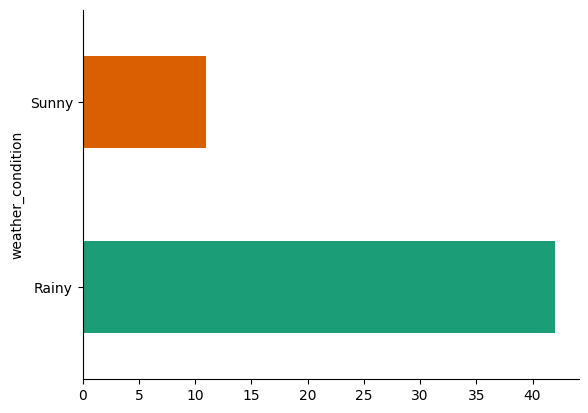

In [83]:
#plotting a graph
dataset.groupby('weather_condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [84]:
#encoding the weather condition column to convert it into numerical format
dataset['weather_condition'] = dataset['weather_condition'].astype(str)  # Ensure the column is string type

label_encoder = LabelEncoder()

# Encode the column
dataset['weather_condition_encoded'] = label_encoder.fit_transform(dataset['weather_condition'])
dataset.head()

,rainfall,temperature,humidity,wind_speed,weather_condition,weather_condition_encoded
0,12.5,15.2,78.0,8.5,Rainy,0
1,8.2,17.8,65.0,5.2,Rainy,0
2,0.0,20.1,52.0,3.1,Sunny,1
3,3.7,18.6,71.0,6.7,Rainy,0
4,21.1,14.8,82.0,9.3,Rainy,0


From the above table we have converted our weather condition to labelled data that is



1.   0 --> Rainy
2.   1 --> Sunny



In [85]:
#dropping the column weather_condition
dataset = dataset.drop('weather_condition',axis=1)

In [46]:
dataset.head()

,rainfall,temperature,humidity,wind_speed,weather_condition_encoded
0,12.5,15.2,78.0,8.5,0
1,8.2,17.8,65.0,5.2,0
2,0.0,20.1,52.0,3.1,1
3,3.7,18.6,71.0,6.7,0
4,21.1,14.8,82.0,9.3,0


In [87]:
#splitting the dataset into training data and testing data
X = dataset.drop('weather_condition_encoded', axis=1)
Y = dataset['weather_condition_encoded']

In [88]:
X.head()

,rainfall,temperature,humidity,wind_speed
0,12.5,15.2,78.0,8.5
1,8.2,17.8,65.0,5.2
2,0.0,20.1,52.0,3.1
3,3.7,18.6,71.0,6.7
4,21.1,14.8,82.0,9.3


In [89]:
Y.head()

,weather_condition_encoded
0,0
1,0
2,1
3,0
4,0


In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(53, 4) (42, 4) (11, 4)


Training the model that is finding the hypothesis function for the given set of data points where X is the independent variable (vector) and Y is the dependent variable whose values are to be predicted.

In [91]:
linear_model = LinearRegression()

In [92]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [93]:
#equation is Y = m1x1 + m2x2 + m3x3 m4x4 + b
#where m1,m2,m3,m4 are the parameters and x1,x2,x3,x4 are input or independent variables
print(f"The intercept of the equation {linear_model.intercept_}")
print(f"The coefficients of the equation that is m1,m2,m3,m4 are {linear_model.coef_}")
print(f"The independent variables x1,x2,x3,x4 are {X_train.columns}")

The intercept of the equation 5.5599570290564015
The coefficients of the equation that is m1,m2,m3,m4 are [ 0.00205882 -0.07485548 -0.07215831  0.15328258]
The independent variables x1,x2,x3,x4 are Index(['rainfall', 'temperature', 'humidity', 'wind_speed'], dtype='object')


The model is now ready now we try to predict some of the values

In [104]:
y_pred = linear_model.predict(X_test)
# Apply the condition: if less than 0, set to 0, if greater than 0, set to 1
y_pred = np.where(y_pred < 0, 0, 1)

# Convert to integer (if needed)
y_pred = y_pred.astype(int)

In [105]:
y_pred = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})

In [106]:
y_pred.head(10)

,Actual,Predicted
38,0,0
37,0,1
32,0,1
44,0,0
48,0,0
0,0,1
27,0,1
1,0,1
23,0,0
13,0,1


from matplotlib import pyplot as plt
_df_22['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Actual']
  ys = series['Predicted']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Actual']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Actual'}, axis=1)
              .sort_values('Actual', ascending=True))
  xs = counted['Actual']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [113]:
input_data = (0,20.1,52,3.1)

#changing the input_data datatype to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the np array as we are predicting for one instance
input_data_df = pd.DataFrame([input_data], columns=['rainfall','temperature', 'humidity', 'wind_speed'])

prediction = np.where(linear_model.predict(input_data_df)< 0, 0, 1)

if(prediction[0]==0):
  print("Rainy")
else:
  print("Sunny")

Sunny
